# Multiple pumps in a circular district heating grid

This example builds upon the simple circular district heating grid described in the notebook 'circular_flow_in_a_district_heating_grid.ipynb'. If you are new to district heating modeling with pandapipes, it is recommended to start with that example to understand the basic concepts and components.

In this notebook, we extend the simple network by introducing multiple pumps (heat generators) and multiple heat consumers. This allows us to analyze more complex operational scenarios, such as the interaction between several pumps and the distribution of heat to multiple consumers.

The network setup, component creation, and analysis steps follow the same structure as in the simple example, but with additional elements to demonstrate the flexibility and scalability of pandapipes for district heating applications.

<img src="../pics/district_heating/multiple_pumps_district_heating_net_text.png">

## Network Setup

In [379]:
import pandapipes as pp
import numpy as np

# create empty net
net = pp.create_empty_network(fluid ="water")

The network consists of several junctions forming a closed loop, similar to the simple example. However, in this case, additional junctions are included to accommodate multiple pumps and heat consumers. The parameters `pn_bar` (pressure) and `tfluid_k` (temperature) are set as initial values for each junction. The actual values are determined by the pumps during the simulation.

This setup allows for the investigation of how multiple heat generators and consumers interact within a district heating grid.

In [380]:
# define constants
qext_w = np.array([500000, 200000])
return_temperature_k = np.array([60,55]) + 273.15
supply_temperature_k = 85 + 273.15

pipetype = "110/202 PLUS"
k = 0.1

flow_pressure_pump = 4
lift_pressure_pump = 1.5
mass_pump_mass_flow = 1

## Junctions

In [381]:
# Junctions for pump
j1 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 1", geodata=(0, 1000))
j2 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 2", geodata=(0, 0))

# Junctions for connection pipes forward line
j3 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 3", geodata=(500, 0))
j4 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 4", geodata=(1000, 0))

# Junctions for heat consumers
j5 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 5", geodata=(1500, 0))
j6 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 6", geodata=(1500, 1000))

# Junctions for connection pipes return line
j7 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 7", geodata=(1000, 1000))
j8 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 8", geodata=(500, 1000))

## Circ Pump Const Pressure, Pipes and Heat Consumers

This example includes two types of pumps: a constant pressure pump and a constant mass flow pump. The constant pressure pump operates similarly to the one in the simple example, maintaining a specified pressure lift and flow temperature. The constant mass flow pump, on the other hand, enforces a fixed mass flow through the network segment.

The combination of different pump types allows for the simulation of more advanced operational strategies and the study of their effects on the network's hydraulic and thermal behavior.

In [382]:
pump1 = pp.create_circ_pump_const_pressure(net, j1, j2, p_flow_bar=flow_pressure_pump,
                                               plift_bar=lift_pressure_pump, t_flow_k=supply_temperature_k,
                                               type="auto", name="pump1")

pipe1 = pp.create_pipe(net, j2, j3, std_type=pipetype, length_km=0.5, k_mm=k, name="pipe1", sections=5, text_k=283)
pipe2 = pp.create_pipe(net, j3, j4, std_type=pipetype, length_km=0.5, k_mm=k, name="pipe2", sections=5, text_k=283)
pipe3 = pp.create_pipe(net, j4, j5, std_type=pipetype, length_km=0.5, k_mm=k, name="pipe3", sections=5, text_k=283)

pp.create_heat_consumer(net, from_junction=j5, to_junction=j6, qext_w=qext_w[0], treturn_k=return_temperature_k[0], name="Consumer A")
pp.create_heat_consumer(net, from_junction=j4, to_junction=j7, qext_w=qext_w[1], treturn_k=return_temperature_k[1], name="Consumer B")

pipe4 = pp.create_pipe(net, j6, j7, std_type=pipetype, length_km=0.5, k_mm=k, name="pipe4", sections=5, text_k=283)
pipe5 = pp.create_pipe(net, j7, j8, std_type=pipetype, length_km=0.5, k_mm=k, name="pipe5", sections=5, text_k=283)
pipe6 = pp.create_pipe(net, j8, j1, std_type=pipetype, length_km=0.5, k_mm=k, name="pipe6", sections=5, text_k=283)

Two heat consumers are included in this network. Each heat consumer extracts a specified amount of heat (`qext_w`) from the network. The return temperature (`treturn_k`) is set for each consumer, and the system calculates the resulting mass flow based on the transferred heat.

This setup enables the analysis of how different consumer demands affect the temperature and pressure distribution in the network.

## Circ Pump Const Mass Flow

In [383]:
### here comes the part with the additional circ_pump_const_mass_flow ###
# first of, the junctions
j9 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 9", geodata=(2000, 0))
j10 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 10", geodata=(2000, 1000))
j11 = pp.create_junction(net, pn_bar=1.05, tfluid_k=supply_temperature_k, name="Junction 11", geodata=(2000, 500))

pipe7 = pp.create_pipe(net, j5, j9, std_type=pipetype, length_km=0.5, k_mm=k, name="pipe7", sections=5, text_k=283)
pipe8 = pp.create_pipe(net, j10, j6, std_type=pipetype, length_km=0.5, k_mm=k, name="pipe8", sections=5, text_k=283)

pump2 = pp.create_circ_pump_const_mass_flow(net, j10, j11, p_flow_bar=flow_pressure_pump, mdot_flow_kg_per_s=mass_pump_mass_flow, 
                                            t_flow_k=supply_temperature_k, type="auto", name="pump2")

flow_control_pump2 = pp.create_flow_control(net, j11, j9, controlled_mdot_kg_per_s=mass_pump_mass_flow)

The flow control component is used to maintain a specified mass flow at a particular location in the network. This is especially important when using a constant mass flow pump, as it ensures the desired flow rate is achieved and helps stabilize the pressure distribution.

## Plotting Net

The following command creates a simple plot of the network layout using `pandapipes.plotting.simple_plot`. 
This visualization helps to understand the structure and connectivity of the district heating grid, showing the positions of junctions, pipes, pumps, and consumers.

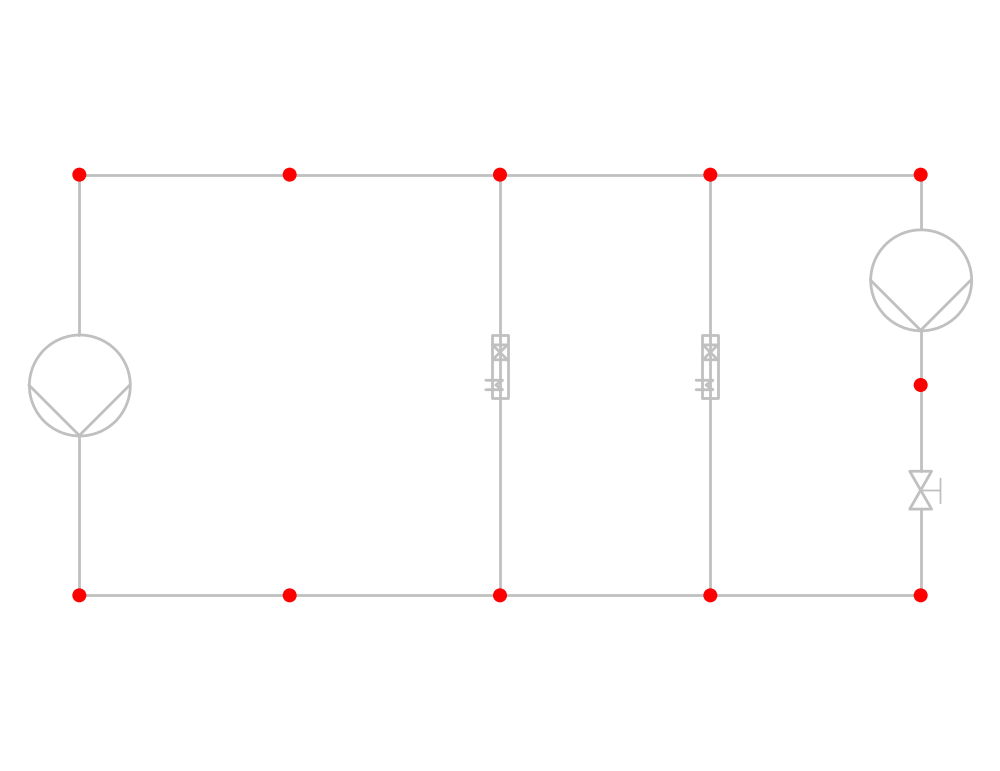

<Axes: >

In [384]:
pp.plotting.simple_plot(net)

## Pipeflow Calculation

We now run a pipe flow calculation using the bidirectional calculation mode. This mode is essential for networks with multiple heat generators and consumers, as it enables the simultaneous calculation of hydraulic and thermal behavior throughout the entire system.

In [385]:
pp.pipeflow(net, mode='bidirectional', iter=100)

Note: The `mode` parameter must be set to 'bidirectional' to enable heat transfer calculations. Increasing the number of iterations (e.g., `iter=100`) may be necessary to ensure convergence in more complex networks with multiple pumps and consumers.

## Results

In [386]:
net.res_junction

,p_bar,t_k
0,2.500000,331.497138
1,4.000000,358.150000
2,3.765631,358.057213
3,3.531273,357.964539
4,3.413784,357.794807
5,3.081328,333.150000
6,2.964553,331.617595
7,2.732275,331.557329
8,3.422251,358.150000
9,3.072721,332.812742


Note that a constant heat flow is extracted via the heat exchangers at the consumer locations. Heat losses due to the ambient temperature are only included in the pipe components, not in the heat exchangers themselves. This means that, if the extracted heat flow is large enough, the temperature level behind a heat exchanger might be lower than the ambient temperature. To avoid this behavior, you could implement a controller that adjusts the extracted heat based on the ambient temperature.

Tip: For larger and more complex networks, visualizing the results can help you better understand the temperature and pressure distribution throughout the system.

In [387]:
net.res_pipe

,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,t_outlet_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_m3_per_s,reynolds,lambda
0,0.701154,4.000000,3.765631,358.150000,358.057213,358.057213,5.440816,-5.440816,0.005618,206203.128764,0.019886
1,0.701109,3.765631,3.531273,358.057213,357.964539,357.964539,5.440816,-5.440816,0.005617,205993.875359,0.019886
2,0.494780,3.531273,3.413784,357.964539,357.794807,357.833422,3.839920,-3.839920,0.003964,145182.298310,0.020016
3,0.487498,3.081328,2.964553,333.150000,331.617595,333.061953,3.839920,-3.839920,0.003906,103816.089343,0.020192
4,0.690206,2.964553,2.732275,331.617595,331.557329,331.557329,5.440816,-5.440816,0.005530,143655.525509,0.020021
5,0.690185,2.732275,2.500000,331.557329,331.497138,331.497138,5.440816,-5.440816,0.005530,143521.552093,0.020021
6,-0.128852,3.413784,3.422251,357.794807,358.150000,358.049038,-1.000000,1.000000,-0.001032,37806.972487,0.021268
7,-0.126947,3.072721,3.081328,332.812742,333.150000,333.082367,-1.000000,1.000000,-0.001017,26985.157872,0.021947


The command above shows the results for the pipe components. The temperatures of the adjacent
junctions are displayed. Due to heat losses, the temperatures at the to-nodes is lower than the
temperatures at the from-nodes. Note also that the junctions are not equal to the internal nodes,
introduced by the pipe sections we defined.

## Results Plotting

In the following cells, results are visualized using custom colored plots to provide a clear overview of the pipe data in the network. These visualizations help to analyze the distribution of key physical properties temperature, pressure, and velocity along each pipe segment.

The plotting code uses a helper function, `plot_pipe_property`, which draws each pipe as a colored line between its start and end junctions. The color of each pipe is determined by the value of the selected property (e.g., temperature, pressure, or velocity), mapped to a color scale (colormap). This approach makes it easy to visually identify gradients and patterns in the network.

Three subplots are generated side by side:

- **Temperature Plot (left):** Shows the average temperature in each pipe (in °C), using a blue-to-red colormap. This allows you to see how heat is distributed and where the largest temperature drops occur due to heat extraction or losses.
- **Pressure Plot (center):** Displays the average pressure in each pipe (in bar), using a green-to-yellow colormap. This helps to identify pressure drops along the network and the effect of pumps.
- **Velocity Plot (right):** Illustrates the mean fluid velocity in each pipe (in m/s), using a purple-to-yellow colormap. This is useful for assessing flow distribution and identifying areas of high or low velocity.

Each subplot includes a colorbar for reference, and the axes are labeled according to the network's spatial coordinates. The plots are generated using the `matplotlib` library, and the data for each property is taken from the `net.res_pipe` results table, which contains the simulation output for all pipes.

This visualization technique is especially helpful for complex networks, as it provides an immediate, intuitive understanding of how the network is operating under the given conditions.

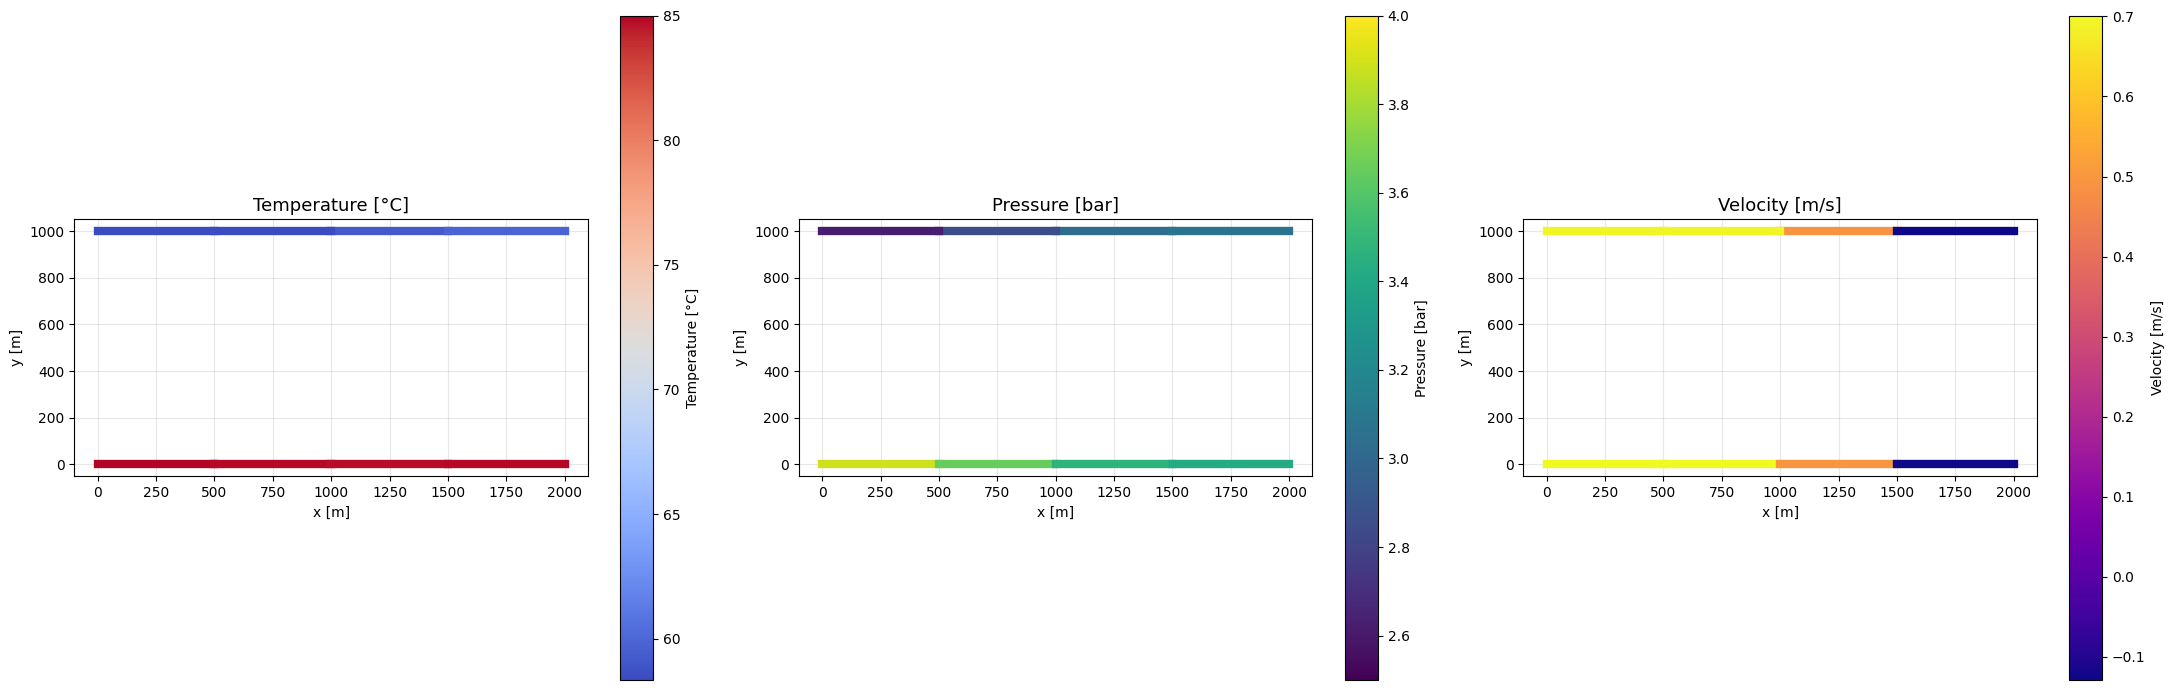

In [388]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(22, 7))
cmap = plt.cm.coolwarm

# Helper to plot a colored pipe property
def plot_pipe_property(ax, property_name, label, vmin=None, vmax=None, cmap=plt.cm.viridis):
    for idx, pipe in net.pipe.iterrows():
        from_junc = pipe['from_junction']
        to_junc = pipe['to_junction']
        x = [net.junction_geodata.at[from_junc, 'x'], net.junction_geodata.at[to_junc, 'x']]
        y = [net.junction_geodata.at[from_junc, 'y'], net.junction_geodata.at[to_junc, 'y']]
        value = net.res_pipe.at[idx, property_name]
        lc = ax.plot(x, y, color=cmap((value - vmin) / (vmax - vmin)), linewidth=6)
    ax.set_title(label, fontsize=13)
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, orientation='vertical', label=label)

# Temperature plot (in °C)
tmin = net.res_pipe[['t_from_k', 't_to_k']].min().min() - 273.15
tmax = net.res_pipe[['t_from_k', 't_to_k']].max().max() - 273.15
net.res_pipe['t_avg_c'] = (net.res_pipe['t_from_k'] + net.res_pipe['t_to_k']) / 2 - 273.15
plot_pipe_property(axes[0], 't_avg_c', 'Temperature [°C]', vmin=tmin, vmax=tmax, cmap=plt.cm.coolwarm)

# Pressure plot (in bar)
pmin = net.res_pipe[['p_from_bar', 'p_to_bar']].min().min()
pmax = net.res_pipe[['p_from_bar', 'p_to_bar']].max().max()
net.res_pipe['p_avg_bar'] = (net.res_pipe['p_from_bar'] + net.res_pipe['p_to_bar']) / 2
plot_pipe_property(axes[1], 'p_avg_bar', 'Pressure [bar]', vmin=pmin, vmax=pmax, cmap=plt.cm.viridis)

# Velocity plot (in m/s)
vmin = net.res_pipe['v_mean_m_per_s'].min()
vmax = net.res_pipe['v_mean_m_per_s'].max()
plot_pipe_property(axes[2], 'v_mean_m_per_s', 'Velocity [m/s]', vmin=vmin, vmax=vmax, cmap=plt.cm.plasma)

plt.tight_layout()
plt.show()

The three plots above provide a detailed visual summary of the pipe results in the district heating network:

- Temperature Plot (left): The color of each pipe represents its average temperature in degrees Celsius. You can see the temperature drop along the flow direction, especially after heat consumers, where heat is extracted from the network. Pipes with higher temperatures are shown in red, while cooler pipes appear blue.

- Pressure Plot (center): This plot shows the average pressure in each pipe in bar. The pressure decreases along the flow path due to friction losses and heat extraction. The effect of the pumps is visible as a sudden increase in pressure at their locations. The color gradient helps to quickly identify regions of high and low pressure.

- Velocity Plot (right): Here, the color indicates the mean fluid velocity in each pipe (in m/s). Higher velocities are typically found in pipes supplying multiple consumers or near the pumps, while lower velocities occur in return lines or branches with less flow. This plot helps to identify flow distribution and potential bottlenecks in the network.

Together, these visualizations make it easy to interpret the hydraulic and thermal state of the network at a glance, highlighting the impact of pumps and consumers on the system.